# Machine Learning

<a target="_blank" href="https://colab.research.google.com/github/vitostamatti/intro-python/blob/main/notebooks/04-machine-learning.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


- dataset: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
base_path = "https://raw.githubusercontent.com/vitostamatti/intro-python/main/data/hr/"

data = pd.read_csv(os.path.join(base_path, "hr-attrition.csv"))

In [4]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

<Axes: title={'center': 'Attrition'}, xlabel='Attrition'>

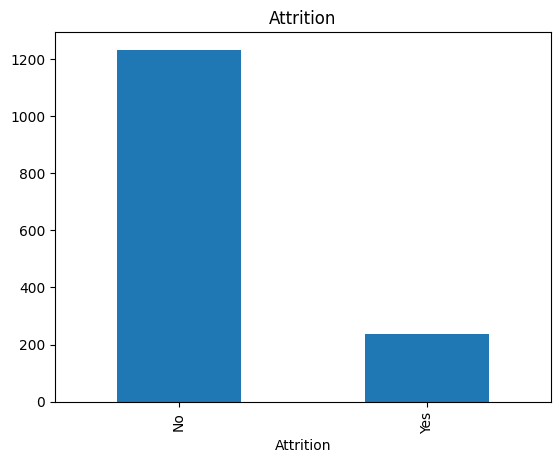

In [5]:
data["Attrition"].value_counts().plot(kind="bar", title="Attrition")

<Axes: xlabel='Department', ylabel='count'>

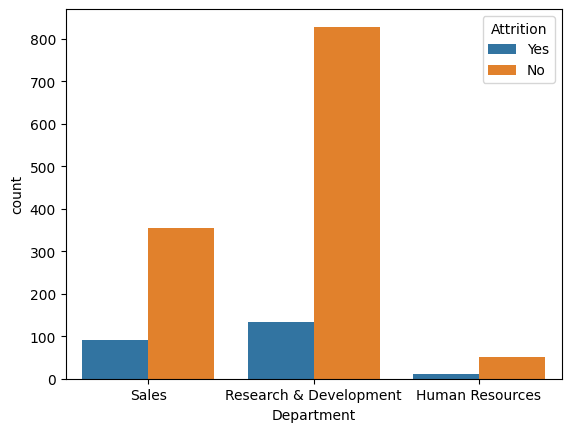

In [6]:
sns.countplot(data, x="Department", hue="Attrition")

<Axes: xlabel='count', ylabel='EducationField'>

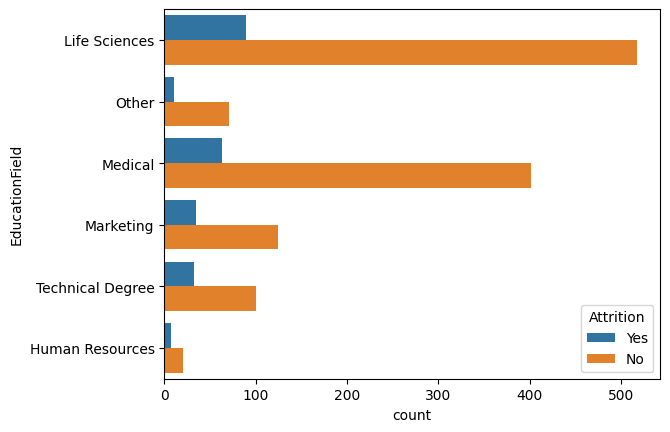

In [7]:
sns.countplot(data, y="EducationField", hue="Attrition")

<Axes: xlabel='Age', ylabel='Count'>

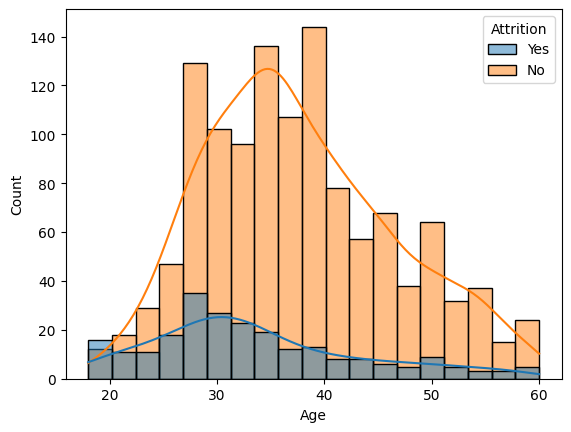

In [8]:
sns.histplot(data, x="Age", hue="Attrition", kde=True)

<Axes: xlabel='MonthlyIncome', ylabel='Count'>

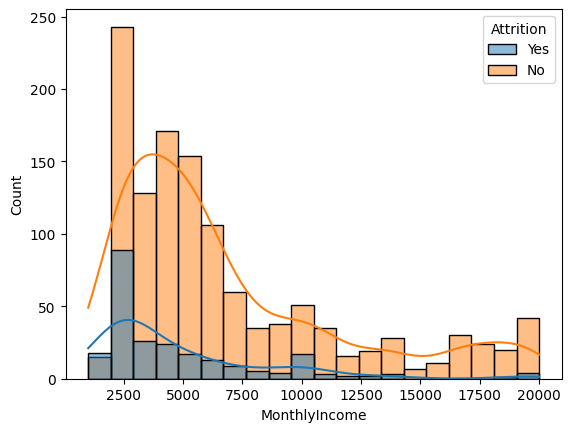

In [9]:
sns.histplot(data, x="MonthlyIncome", hue="Attrition", kde=True)

In [10]:
# prepare data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X, y = data.drop(columns=["Attrition"]), data["Attrition"]
y = LabelEncoder().fit_transform(y)

# drop unused columns
cols_to_drop = ["EmployeeNumber"]
X = X.drop(columns=cols_to_drop)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [11]:
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

str_col_selector = make_column_selector(dtype_include="object")
num_col_selector = make_column_selector(dtype_exclude="object")
ct = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore"), str_col_selector),
    (StandardScaler(), num_col_selector),
    remainder="drop",
)
model = make_pipeline(ct, LogisticRegression(random_state=42))
model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000026912E65840>),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000026912E39060>)])),
                ('logisticregression', LogisticRegression(random_state=42))])

In [12]:
# evaluate
from sklearn.metrics import accuracy_score, recall_score, precision_score

y_pred = model.predict(X_test)
print(f"accuracy_score: {accuracy_score(y_test,y_pred):.3f}")
print(f"precision_score: {precision_score(y_test,y_pred):.3f}")
print(f"recall_score: {recall_score(y_test,y_pred):.3f}")

accuracy_score: 0.891
precision_score: 0.621
recall_score: 0.462


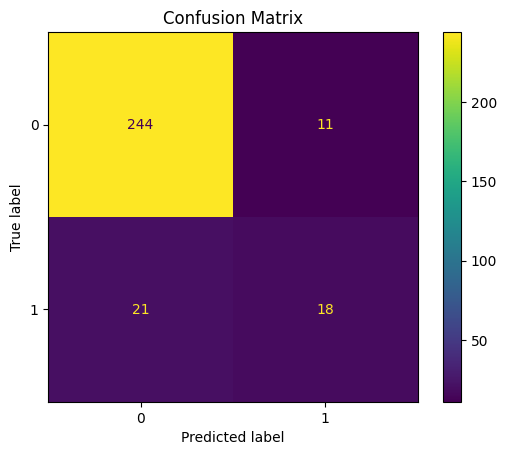

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
)
plt.title("Confusion Matrix")
plt.show()